## Credit Rating Prediction

### Problem Statement

**It becomes strategically crucial for the banking industry to be able to determine whether a client is going to miss a premium payment or not. It is crucial for banks to be able to identify clients who have a high tendency to default early on since failing to anticipate the default propensity can lead to revenue losses. Who is likely to miss a premium payment? We will build models to predict which customers are likely to default using Machine Learning.**

**Data Definition:**

Attribute 1: **checkingstatus1**

Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: **duration**

Duration in month

Attribute 3: **history**

Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: **Purpose**

A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: **amount**

Credit amount

Attibute 6: **savings**

Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: **employ**

Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: **installment**

Installment rate in percentage of disposable income

Attribute 9: **status**

Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: **others**

Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: **residenc

Attribute 12: **Property**

A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: **age**

Age in years

Attribute 14: **otherplans**

Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: **housing**

Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: **cards**

Number of existing credits at this bank

Attribute 17: **job**

Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: **liable**

Number of people being liable to provide maintenance for

Attribute 19: **tele**

Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: **foreign**

foreign worker
A201 : yes
A202 : no


**Importing Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
data = pd.read_csv("germancredit.csv")

In [3]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",100)

### EDA

In [4]:
cor = data.corr()

<AxesSubplot:>

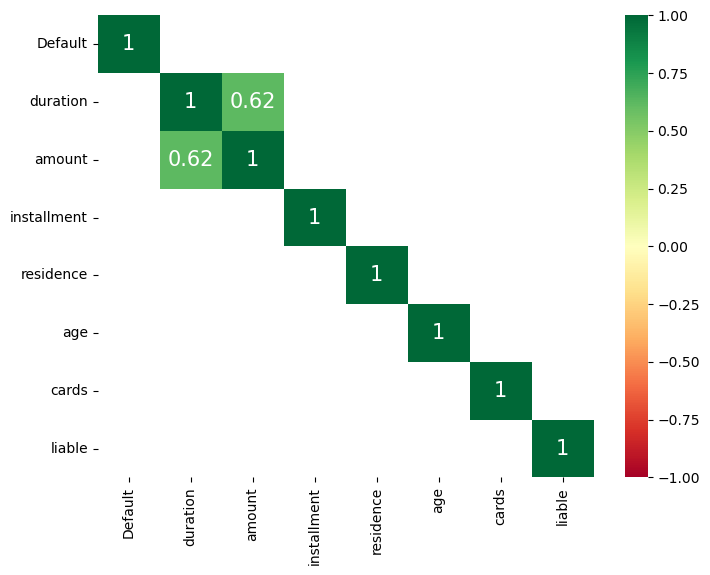

In [5]:
plt.figure(figsize=(8, 6))


sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.5)], cmap = "RdYlGn", vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

In [6]:
data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [7]:
data.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
data.describe(include = 'object')

,checkingstatus1,history,purpose,savings,employ,status,others,property,otherplans,housing,job,tele,foreign
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [9]:
data['Default'].value_counts()

0    700
1    300
Name: Default, dtype: int64

<AxesSubplot:>

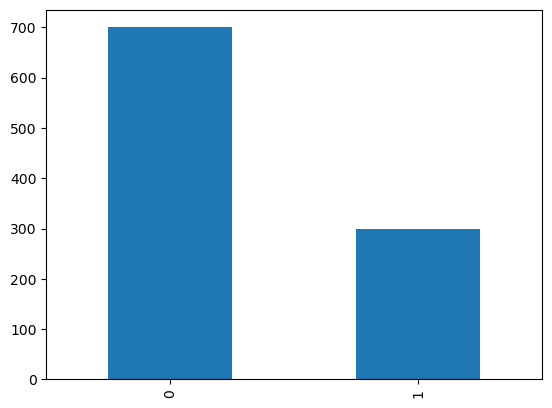

In [10]:
data['Default'].value_counts().plot(kind = 'bar')

**We can observe that our target variable which is 'Default' is a bit imbalanced it contains two class 0 and 1 where out of 1000, 0 is 700 and 1 is 300.** 

This problem of imbalance data will impact the trainig of our models and the algorithm we use will not be able to learn the class 1 properly which might result in less accurate predictions

## Missing value treatment

In [11]:
data.isnull().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

**There are no missing values in the dataset**

## Outlier detection

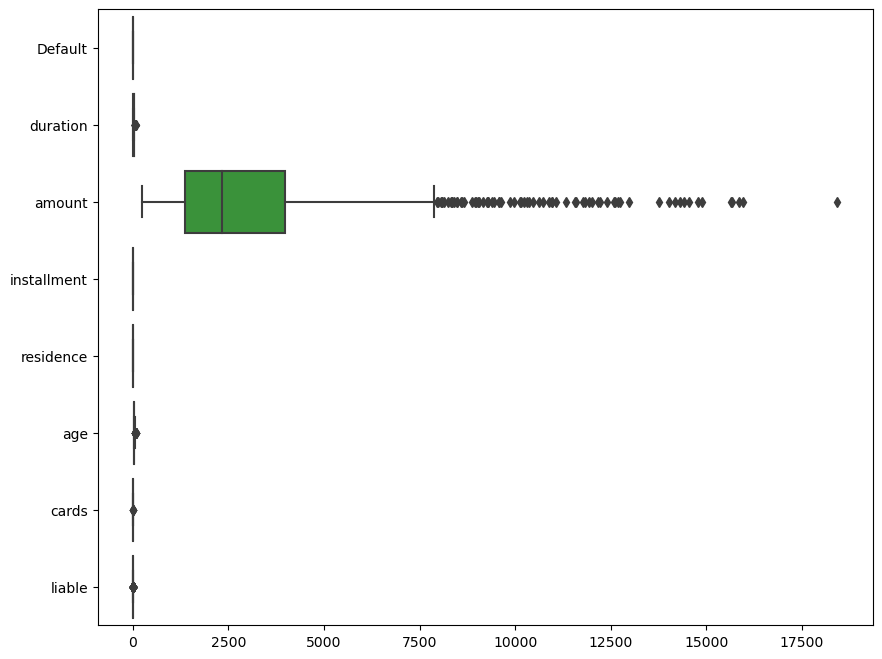

In [12]:
plt.figure(figsize=(10,8))
a = sns.boxplot(data = data.select_dtypes(exclude = 'object' ), orient = 'h')
plt.show()

**Because of amount variable the boxplot of other variables are not clearly visible**

**Normalizing the data using z score normalization from the scipy library so we can visualize our boxplots much better as after normalization the scale of variables will be same.**

In [22]:
import scipy.stats as stats

In [23]:
df = stats.zscore(data.drop(['Default', 'checkingstatus1',	'history',	'purpose',	'savings',	'employ',	'status',	'others',	'property',	'otherplans',	'housing',	'job',	'tele',	'foreign'], axis = 1))

In [24]:
df.head()

,duration,amount,installment,residence,age,cards,liable
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


<AxesSubplot:>

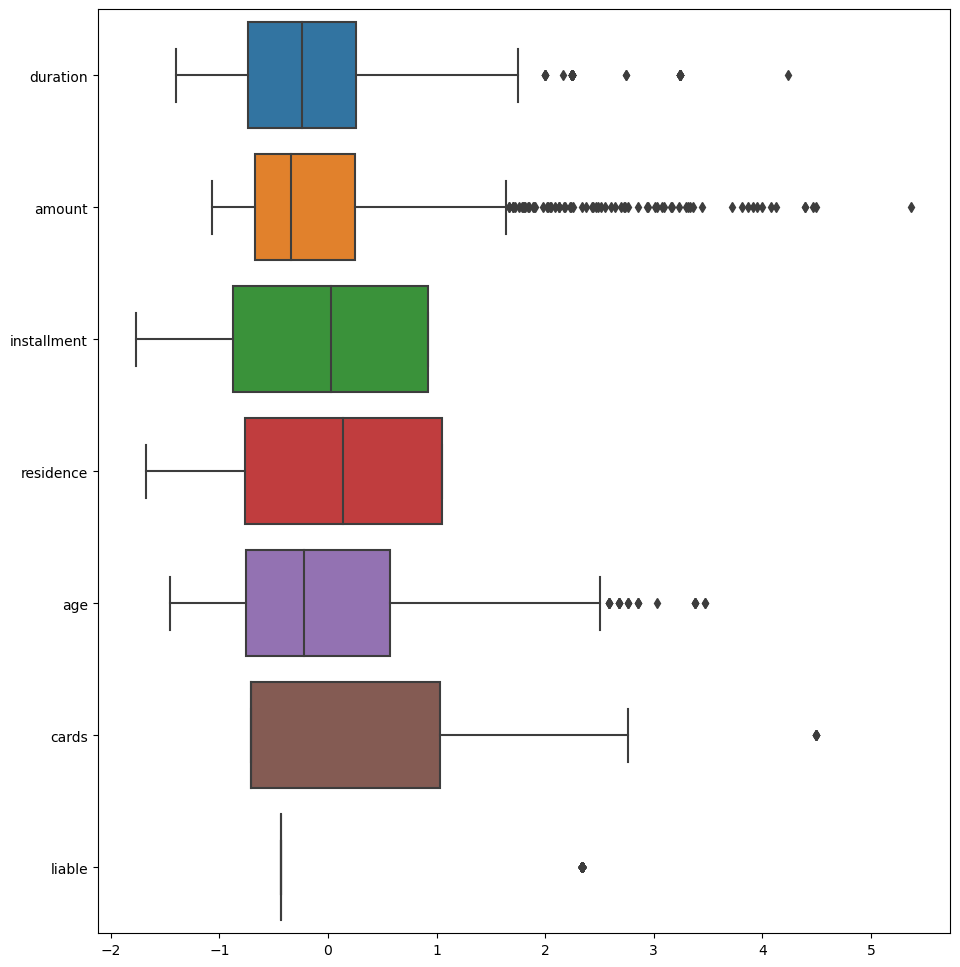

In [25]:
plt.figure(figsize=(11,12))
sns.boxplot(data=df, orient = 'h')


features **duration, amount, age** have many ouliers whereas **cards and liable** have very few to neglidgible outliers

### Capping outliers

In [26]:
features_with_outliers = ['amount','duration', 'age', 'cards', 'liable']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

<AxesSubplot:>

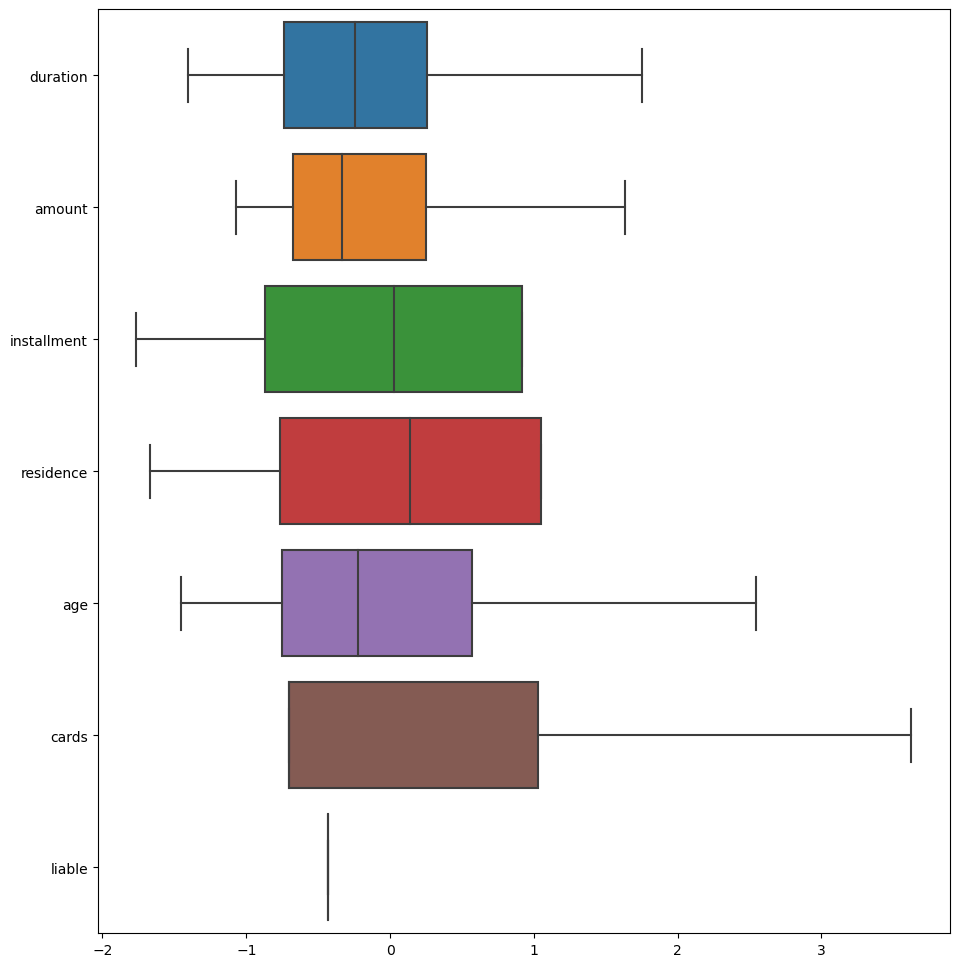

In [27]:
plt.figure(figsize=(11,12))
sns.boxplot(data= df, orient = 'h')

Now we have capped our outlier and our data is ready for modelling 

### converting categorical variables using one hot dummy encoding 

In [29]:
data_dum = pd.get_dummies(data[['checkingstatus1',	'history',	'purpose',	'savings',	'employ',	'status',	'others',	'property',	'otherplans',	'housing',	'job',	'tele',	'foreign']])

In [30]:
data_n = pd.concat([df,data_dum,data['Default']],axis = 1)

In [31]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   duration             1000 non-null   float64
 1   amount               1000 non-null   float64
 2   installment          1000 non-null   float64
 3   residence            1000 non-null   float64
 4   age                  1000 non-null   float64
 5   cards                1000 non-null   float64
 6   liable               1000 non-null   float64
 7   checkingstatus1_A11  1000 non-null   uint8  
 8   checkingstatus1_A12  1000 non-null   uint8  
 9   checkingstatus1_A13  1000 non-null   uint8  
 10  checkingstatus1_A14  1000 non-null   uint8  
 11  history_A30          1000 non-null   uint8  
 12  history_A31          1000 non-null   uint8  
 13  history_A32          1000 non-null   uint8  
 14  history_A33          1000 non-null   uint8  
 15  history_A34          1000 non-null   ui

# Logistic Regression

In [32]:
X = data_n.drop(['Default','liable'], axis = 1)
y = data_n['Default']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


from sklearn.preprocessing import StandardScaler


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

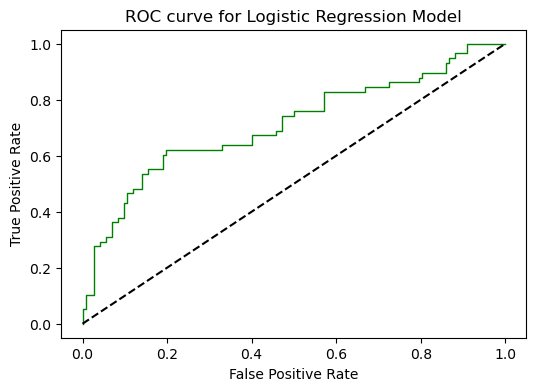

In [36]:
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [37]:
pd.DataFrame({"fpr":fpr, "tpr":tpr, "threshold":thresholds})

,fpr,tpr,threshold
0,0.000000,0.000000,1.725353
1,0.000000,0.017241,0.725353
2,0.000000,0.051724,0.703594
3,0.007042,0.051724,0.700411
4,0.007042,0.103448,0.666568
5,0.028169,0.103448,0.626828
6,0.028169,0.275862,0.561398
7,0.042254,0.275862,0.525667
8,0.042254,0.293103,0.510804
9,0.056338,0.293103,0.485307


In [38]:
thresholds[np.argmax(tpr - fpr)]

0.316966355632772

In [39]:
pred_proba = y_pred_logreg_proba[:,1]

In [40]:
preds = np.where(pred_proba>0.31, 1, 0)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score

In [42]:
print('Accuracy:', accuracy_score(y_test, preds))
print('F1 score:', f1_score(y_test, preds,average='weighted'))
print('Recall:', recall_score(y_test, preds,
                              average='weighted'))
print('Precision:', precision_score(y_test, preds,
                                    average='weighted'))
print('\n clasification report:\n', classification_report(y_test, preds))

Accuracy: 0.745
F1 score: 0.7490340759003259
Recall: 0.745
Precision: 0.7549116809116809

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       142
           1       0.55      0.62      0.59        58

    accuracy                           0.74       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.75      0.74      0.75       200



Model accuracy: 0.745


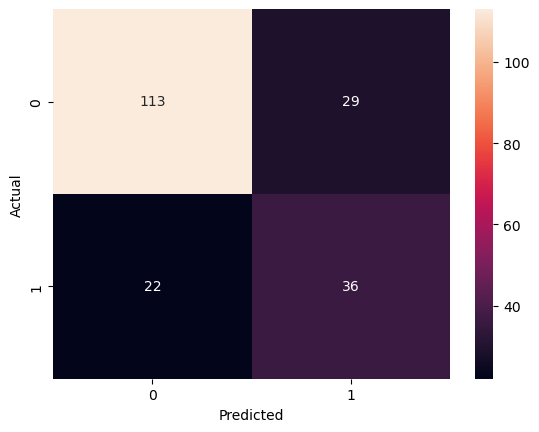

In [43]:
cm = confusion_matrix(y_test, preds)
s = sns.heatmap(cm ,annot=True ,fmt='d')
s.set(xlabel='Predicted', ylabel='Actual')
print("Model accuracy:",accuracy_score(y_test, preds))

**Tabulating our models results** 

In [44]:
cols = ['Model', 'Accuracy', 'Precision', 'Recall']

tabulation = pd.DataFrame(columns = cols)

model_metrics = pd.Series({'Model': "Logistic Regression ",
                           'Accuracy':accuracy_score(y_test, preds),
                          'F1 Score': f1_score(y_test, preds,average='weighted'),
                          'Precision': precision_score(y_test, preds, average='weighted'),
                          "Recall":recall_score(y_test, preds, average='weighted')})

tabulation = tabulation.append(model_metrics, ignore_index = True)

tabulation

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.745,0.754912,0.745,0.749034


# Decision Tree

In [45]:
data_n.head()

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A11,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,history_A30,history_A31,history_A32,history_A33,history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employ_A71,employ_A72,employ_A73,employ_A74,employ_A75,status_A91,status_A92,status_A93,status_A94,others_A101,others_A102,others_A103,property_A121,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202,Default
0,-1.236478,-0.745131,0.918477,1.046987,2.546575,1.027079,-0.42829,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
1,1.750384,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.42829,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,-0.42829,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,-0.42829,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,-0.42829,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1


In [46]:
X1 = data_n.drop(['Default','liable'], axis = 1)
y1 = data_n['Default']

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size = 0.25, random_state = 0)

In [48]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [49]:
classifier_dt = DecisionTreeClassifier(max_depth=5,random_state=0)
classifier_dt.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [50]:
y_pred_logreg_proba_dt = classifier_dt.predict_proba(X_test1)
y_pred_logreg_proba_dt

array([[0.29032258, 0.70967742],
       [0.92241379, 0.07758621],
       [0.92241379, 0.07758621],
       [0.69934641, 0.30065359],
       [0.92241379, 0.07758621],
       [0.92241379, 0.07758621],
       [0.        , 1.        ],
       [0.92241379, 0.07758621],
       [0.92241379, 0.07758621],
       [0.54      , 0.46      ],
       [0.54      , 0.46      ],
       [0.29032258, 0.70967742],
       [0.69934641, 0.30065359],
       [0.29032258, 0.70967742],
       [0.29032258, 0.70967742],
       [0.92241379, 0.07758621],
       [0.69934641, 0.30065359],
       [1.        , 0.        ],
       [0.69934641, 0.30065359],
       [0.90322581, 0.09677419],
       [0.29032258, 0.70967742],
       [0.29032258, 0.70967742],
       [0.54      , 0.46      ],
       [0.92241379, 0.07758621],
       [1.        , 0.        ],
       [0.29032258, 0.70967742],
       [1.        , 0.        ],
       [0.90322581, 0.09677419],
       [1.        , 0.        ],
       [0.29032258, 0.70967742],
       [0.

In [51]:
y_pred_logreg_val_dt = classifier_dt.predict(X_test1)
y_pred_logreg_val_dt

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

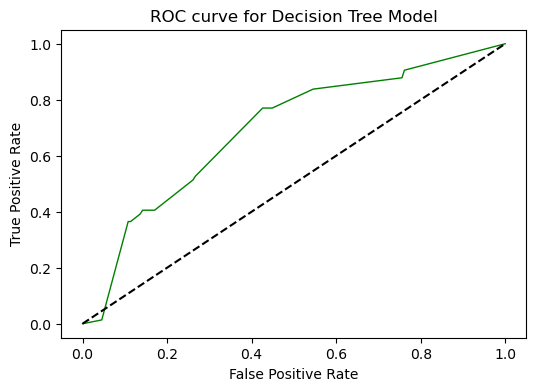

In [52]:
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test1, y_pred_logreg_proba_dt[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_dt,tpr_dt,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Decision Tree Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [53]:
pred_proba_dt = y_pred_logreg_proba_dt[:,1]

In [54]:
preds_dt = np.where(pred_proba_dt>0.70, 1, 0)

In [55]:
print('Accuracy:', accuracy_score(y_test1, preds_dt))
print('F1 score:', f1_score(y_test1, preds_dt,average='weighted'))
print('Recall:', recall_score(y_test1, preds_dt,
                              average='weighted'))
print('Precision:', precision_score(y_test1, preds_dt,
                                    average='weighted'))
print('\n clasification report:\n', classification_report(y_test1, preds_dt))

Accuracy: 0.736
F1 score: 0.7149263157894739
Recall: 0.736
Precision: 0.7155430520034102

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       176
           1       0.59      0.36      0.45        74

    accuracy                           0.74       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.72      0.74      0.71       250



Model accuracy: 0.736


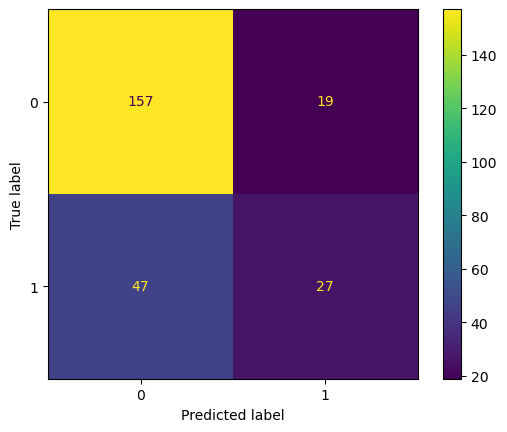

In [56]:
cm_dt = confusion_matrix(y_test1, preds_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()
print("Model accuracy:",accuracy_score(y_test1, preds_dt))

In [57]:
from sklearn import tree

In [58]:
plt.figure(figsize=(30,30), dpi=500)
tree.plot_tree(classifier_dt)
plt.show()

In [59]:
model_metrics1 = pd.Series({'Model': "Descision Tree",
                           'Accuracy':accuracy_score(y_test1, preds_dt),
                          'F1 Score': f1_score(y_test1, preds_dt,average='weighted'),
                          'Precision': precision_score(y_test1, preds_dt, average='weighted'),
                          "Recall":recall_score(y_test1, preds_dt, average='weighted')})

tabulation = tabulation.append(model_metrics1, ignore_index = True)

In [60]:
tabulation

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.745,0.754912,0.745,0.749034
1,Descision Tree,0.736,0.715543,0.736,0.714926


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X2 = data_n.drop(['Default','liable'], axis = 1)
y2 = data_n['Default']

In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.25, random_state = 0)

In [64]:
classifier_rf = RandomForestClassifier(n_estimators= 20 ,max_depth=10, random_state=0)
classifier_rf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)

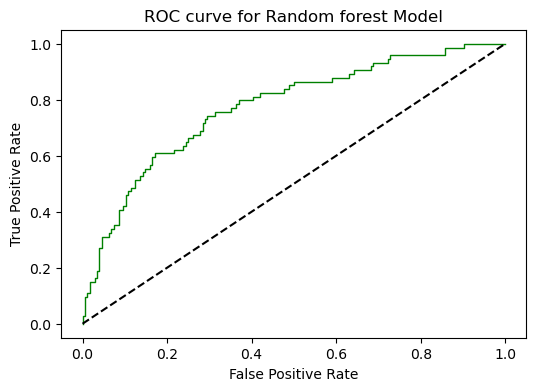

In [65]:
y_pred_logreg_proba_rf = classifier_rf.predict_proba(X_test2)
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test2, y_pred_logreg_proba_rf[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_rf,tpr_rf,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random forest Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [66]:
pred_proba_rf = y_pred_logreg_proba_rf[:,1]

In [67]:
preds_rf = np.where(pred_proba_rf>0.70, 1, 0)

Model accuracy: 0.716


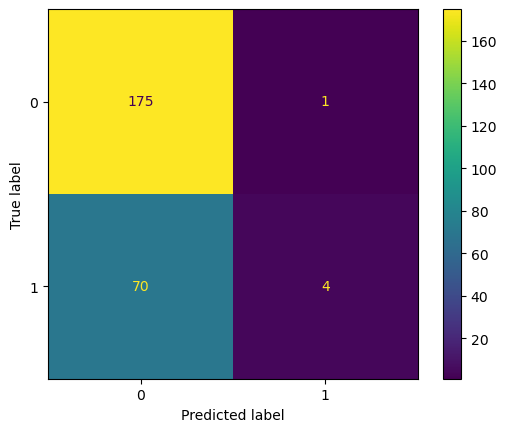

In [68]:
cm_rf = confusion_matrix(y_test2, preds_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
print("Model accuracy:",accuracy_score(y_test2, preds_rf))

In [69]:
print('Accuracy:', accuracy_score(y_test2, preds_rf))
print('F1 score:', f1_score(y_test2, preds_rf,average='weighted'))
print('Recall:', recall_score(y_test2, preds_rf,
                              average='weighted'))
print('Precision:', precision_score(y_test2, preds_rf,
                                    average='weighted'))
print('\n clasification report:\n', classification_report(y_test2, preds_rf))

Accuracy: 0.716
F1 score: 0.615247842689197
Recall: 0.716
Precision: 0.7396571428571428

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83       176
           1       0.80      0.05      0.10        74

    accuracy                           0.72       250
   macro avg       0.76      0.52      0.47       250
weighted avg       0.74      0.72      0.62       250



In [70]:
model_metrics2 = pd.Series({'Model': "Random Forest",
                           'Accuracy':accuracy_score(y_test2, preds_rf),
                          'F1 Score': f1_score(y_test2, preds_rf,average='weighted'),
                          'Precision': precision_score(y_test2, preds_rf, average='weighted'),
                          "Recall":recall_score(y_test2, preds_rf, average='weighted')})

tabulation = tabulation.append(model_metrics2, ignore_index = True)

In [71]:
tabulation

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.745,0.754912,0.745,0.749034
1,Descision Tree,0.736,0.715543,0.736,0.714926
2,Random Forest,0.716,0.739657,0.716,0.615248


## From our 3 models, we'll go ahead and choose Logistic Regression as our model because it has the highest accuracy and F1 score.